In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
csv_url = "/content/filtered_nyc_data.csv"
data = pd.read_csv(csv_url)
data.head()

,C/A,Unit,SCP,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,03:00:00,REGULAR,7682542,2659808
1,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,07:00:00,REGULAR,7682543,2659819
2,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,11:00:00,REGULAR,7682552,2659875
3,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,15:00:00,REGULAR,7682593,2659931
4,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,19:00:00,REGULAR,7682619,2659985


In [3]:

# Strip whitespace from column names
data.columns = data.columns.str.strip()

data.head()

,C/A,Unit,SCP,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,03:00:00,REGULAR,7682542,2659808
1,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,07:00:00,REGULAR,7682543,2659819
2,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,11:00:00,REGULAR,7682552,2659875
3,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,15:00:00,REGULAR,7682593,2659931
4,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,19:00:00,REGULAR,7682619,2659985


In [4]:
data = data.drop('Description', axis=1)
data.head()

,C/A,Unit,SCP,Line Name,Division,Date,Time,Entries,Exits
0,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,03:00:00,7682542,2659808
1,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,07:00:00,7682543,2659819
2,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,11:00:00,7682552,2659875
3,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,15:00:00,7682593,2659931
4,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,19:00:00,7682619,2659985


In [5]:
data.columns

Index(['C/A', 'Unit', 'SCP', 'Line Name', 'Division', 'Date', 'Time',
       'Entries', 'Exits'],
      dtype='object')

In [6]:

data['Total Traffic'] = data['Entries'] + data['Exits']
data['Net Traffic'] = data['Entries'] - data['Exits']

data.head()

,C/A,Unit,SCP,Line Name,Division,Date,Time,Entries,Exits,Total Traffic,Net Traffic
0,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,03:00:00,7682542,2659808,10342350,5022734
1,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,07:00:00,7682543,2659819,10342362,5022724
2,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,11:00:00,7682552,2659875,10342427,5022677
3,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,15:00:00,7682593,2659931,10342524,5022662
4,A002,R051,02-00-00,NQR456W,BMT,01/30/2022,19:00:00,7682619,2659985,10342604,5022634


In [7]:
# Display units with negative net traffic
data[data['Net Traffic'] < 0]


,C/A,Unit,SCP,Line Name,Division,Date,Time,Entries,Exits,Total Traffic,Net Traffic
12,A002,R051,02-03-00,NQR456W,BMT,01/30/2022,03:00:00,1482150,5636857,7119007,-4154707
13,A002,R051,02-03-00,NQR456W,BMT,01/30/2022,07:00:00,1482151,5636875,7119026,-4154724
14,A002,R051,02-03-00,NQR456W,BMT,01/30/2022,11:00:00,1482157,5636987,7119144,-4154830
15,A002,R051,02-03-00,NQR456W,BMT,01/30/2022,15:00:00,1482173,5637168,7119341,-4154995
16,A002,R051,02-03-00,NQR456W,BMT,01/30/2022,19:00:00,1482209,5637296,7119505,-4155087
...,...,...,...,...,...,...,...,...,...,...,...
32133,R612,R057,01-03-02,BDNQR2345,IRT,01/24/2022,07:00:00,1667124,1755498,3422622,-88374
32134,R612,R057,01-03-02,BDNQR2345,IRT,01/24/2022,11:00:00,1667177,1755697,3422874,-88520
32135,R612,R057,01-03-02,BDNQR2345,IRT,01/24/2022,15:00:00,1667223,1755859,3423082,-88636
32136,R612,R057,01-03-02,BDNQR2345,IRT,01/24/2022,19:00:00,1667363,1756154,3423517,-88791


In [8]:


# Assuming 'Time' column exists and is in a format that can be parsed
# Example format: "HH:MM:SS" or "HH:MM"
try:
    # Convert the 'Time' column to datetime objects
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
    # Extract the hour and convert it to an integer
    data['Hour'] = data['Time'].dt.hour
    # Drop the original 'Time' column if needed
    data = data.drop('Time', axis=1)
    print(data.head())

except ValueError:
    print("Error: The 'Time' column format is not recognized or is not present.")
    # Handle the error appropriately, perhaps by checking for a different time format or informing the user
except KeyError:
    print("Error: 'Time' column not found in the DataFrame.")

    C/A  Unit       SCP Line Name Division        Date  Entries    Exits  \
0  A002  R051  02-00-00   NQR456W      BMT  01/30/2022  7682542  2659808   
1  A002  R051  02-00-00   NQR456W      BMT  01/30/2022  7682543  2659819   
2  A002  R051  02-00-00   NQR456W      BMT  01/30/2022  7682552  2659875   
3  A002  R051  02-00-00   NQR456W      BMT  01/30/2022  7682593  2659931   
4  A002  R051  02-00-00   NQR456W      BMT  01/30/2022  7682619  2659985   

   Total Traffic  Net Traffic  Hour  
0       10342350      5022734     3  
1       10342362      5022724     7  
2       10342427      5022677    11  
3       10342524      5022662    15  
4       10342604      5022634    19  


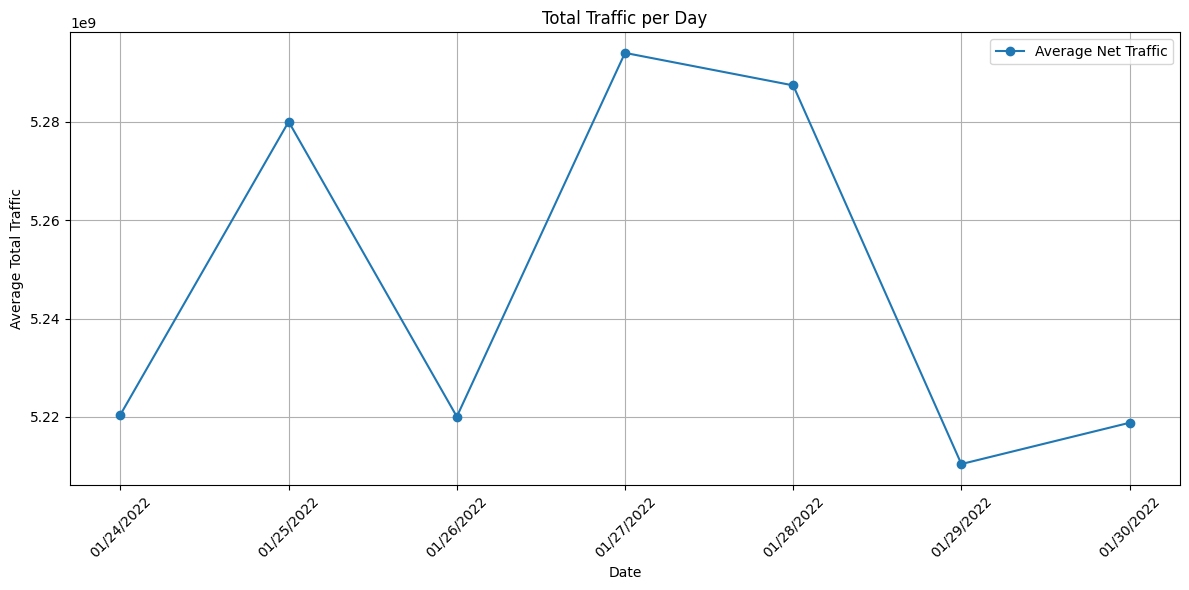

In [24]:
# prompt: actually give me one chart per day, do the average of that

import pandas as pd
import matplotlib.pyplot as plt

# ... (your existing code)

traffic_by_day = data.groupby('Date').agg({'Total Traffic': 'sum'}).reset_index()
traffic_by_day['Average Net Traffic'] = traffic_by_day['Total Traffic'] / 50

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(traffic_by_day['Date'], traffic_by_day['Average Net Traffic'], marker='o', label='Average Net Traffic')

plt.xlabel('Date')
plt.ylabel('Average Total Traffic')
plt.title('Total Traffic per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

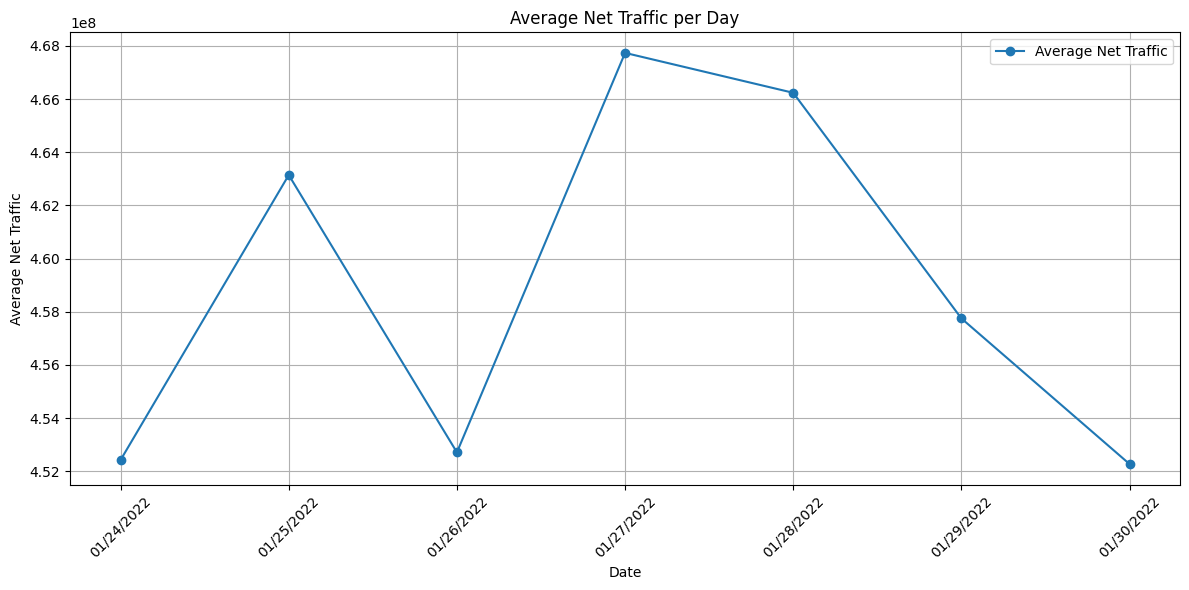

In [21]:
# prompt: actually give me one chart per day, do the average of that

import pandas as pd
import matplotlib.pyplot as plt

# ... (your existing code)

traffic_by_day = data.groupby('Date').agg({'Net Traffic': 'sum'}).reset_index()
traffic_by_day['Average Net Traffic'] = traffic_by_day['Net Traffic'] / 50

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(traffic_by_day['Date'], traffic_by_day['Average Net Traffic'], marker='o', label='Average Net Traffic')

plt.xlabel('Date')
plt.ylabel('Average Net Traffic')
plt.title('Average Net Traffic per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

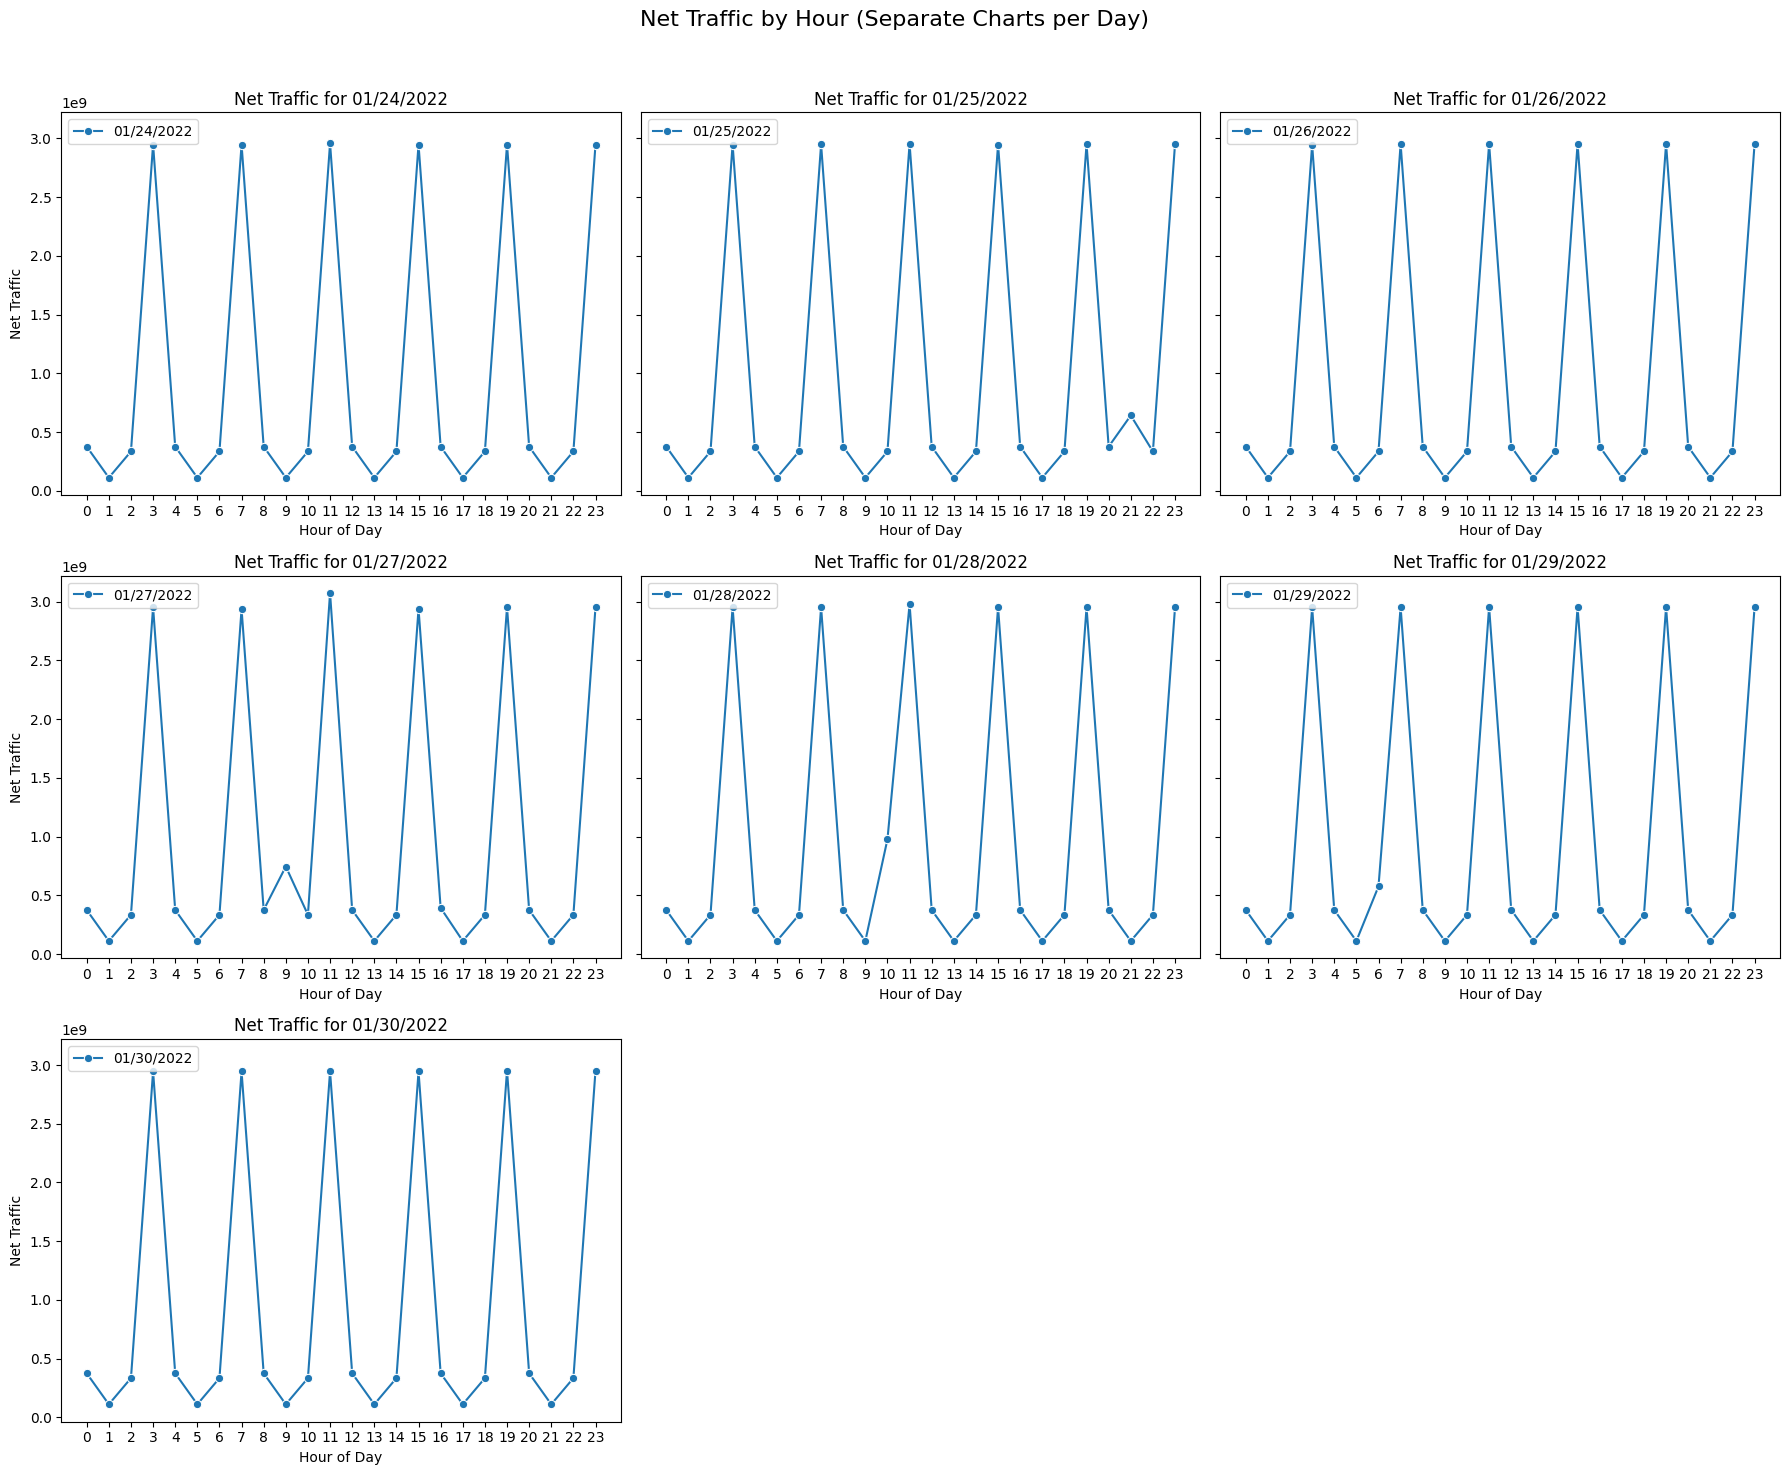

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group data by Date and Hour, and calculate Net Traffic
daily_hourly_data = data.groupby(['Date', 'Hour']).agg({
    'Entries': 'sum',
    'Exits': 'sum'
}).reset_index()
daily_hourly_data['Net Traffic'] = daily_hourly_data['Entries'] - daily_hourly_data['Exits']

# Get unique dates
unique_dates = daily_hourly_data['Date'].unique()

# Define the grid layout: 3 charts per row
charts_per_row = 3
num_rows = math.ceil(len(unique_dates) / charts_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(18, num_rows * 5), sharey=True)
axes = axes.flatten()  # Flatten for easier indexing

# Plot Net Traffic for each day
for i, date in enumerate(unique_dates):
    # Filter data for the current date
    date_data = daily_hourly_data[daily_hourly_data['Date'] == date]

    # Plot for the current date
    sns.lineplot(
        ax=axes[i],
        data=date_data,
        x='Hour',
        y='Net Traffic',
        marker='o',
        label=f'{date}'
    )
    axes[i].set_title(f'Net Traffic for {date}')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel('Net Traffic')
    axes[i].set_xticks(range(0, 24))  # Ensure all hours are displayed
    axes[i].legend(loc='upper left')

# Hide unused subplots
for j in range(len(unique_dates), len(axes)):
    axes[j].axis('off')

# Adjust layout
fig.suptitle('Net Traffic by Hour (Separate Charts per Day)', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


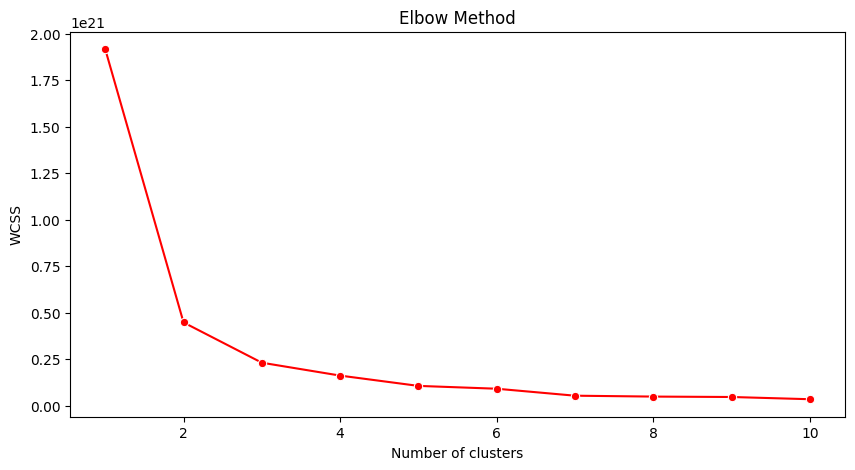

In [12]:
# prompt: do a elbow and visualized it

# ... (your existing code)

# Elbow method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data[['Entries', 'Exits']])  # Use relevant columns for clustering
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

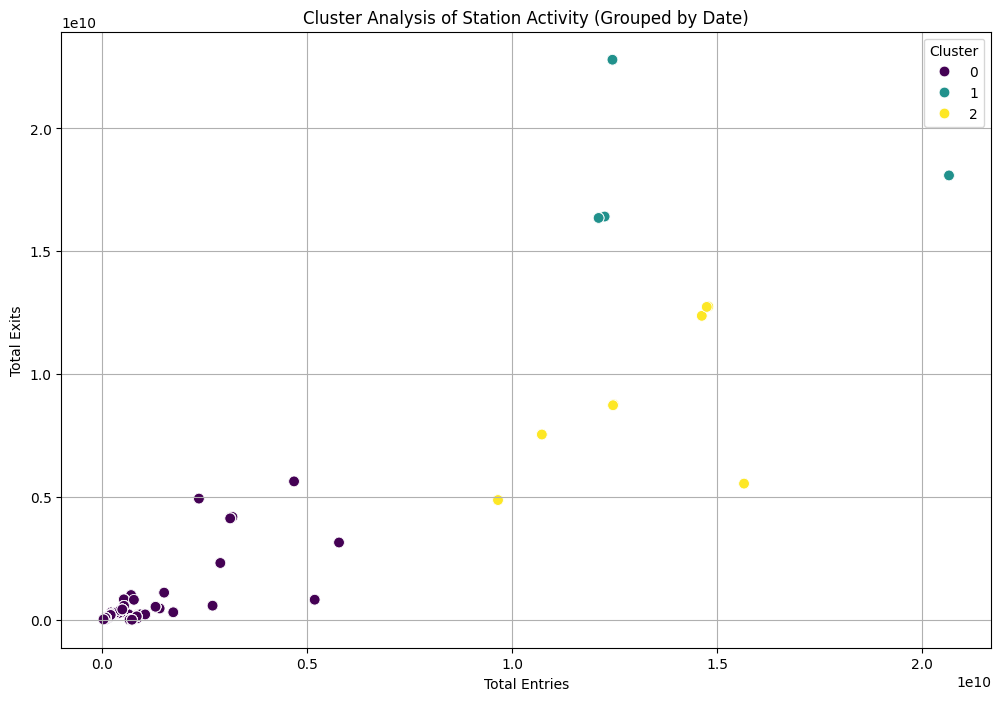

   Unit        Date     Entries      Exits  Cluster
0  R001  01/24/2022  2695723936  583084383        0
1  R001  01/25/2022  2695775963  583147407        0
2  R001  01/26/2022  2695829802  583211605        0
3  R001  01/27/2022  2695882726  583274981        0
4  R001  01/28/2022  2695934652  583335699        0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Group by Unit and Date to analyze daily station activity
daily_station_activity = data.groupby(['Unit', 'Date']).agg({
    'Entries': 'sum',
    'Exits': 'sum'
}).reset_index()

# Standardize the Entries and Exits data
scaler = StandardScaler()
scaled_daily_activity = scaler.fit_transform(daily_station_activity[['Entries', 'Exits']])

# Apply KMeans clustering
optimal_k = 3  # You can adjust this using the elbow method if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
daily_station_activity['Cluster'] = kmeans.fit_predict(scaled_daily_activity)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=daily_station_activity,
    x='Entries',
    y='Exits',
    hue='Cluster',
    palette='viridis',
    s=60
)
plt.title('Cluster Analysis of Station Activity (Grouped by Date)')
plt.xlabel('Total Entries')
plt.ylabel('Total Exits')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Inspect the clustered data
print(daily_station_activity.head())

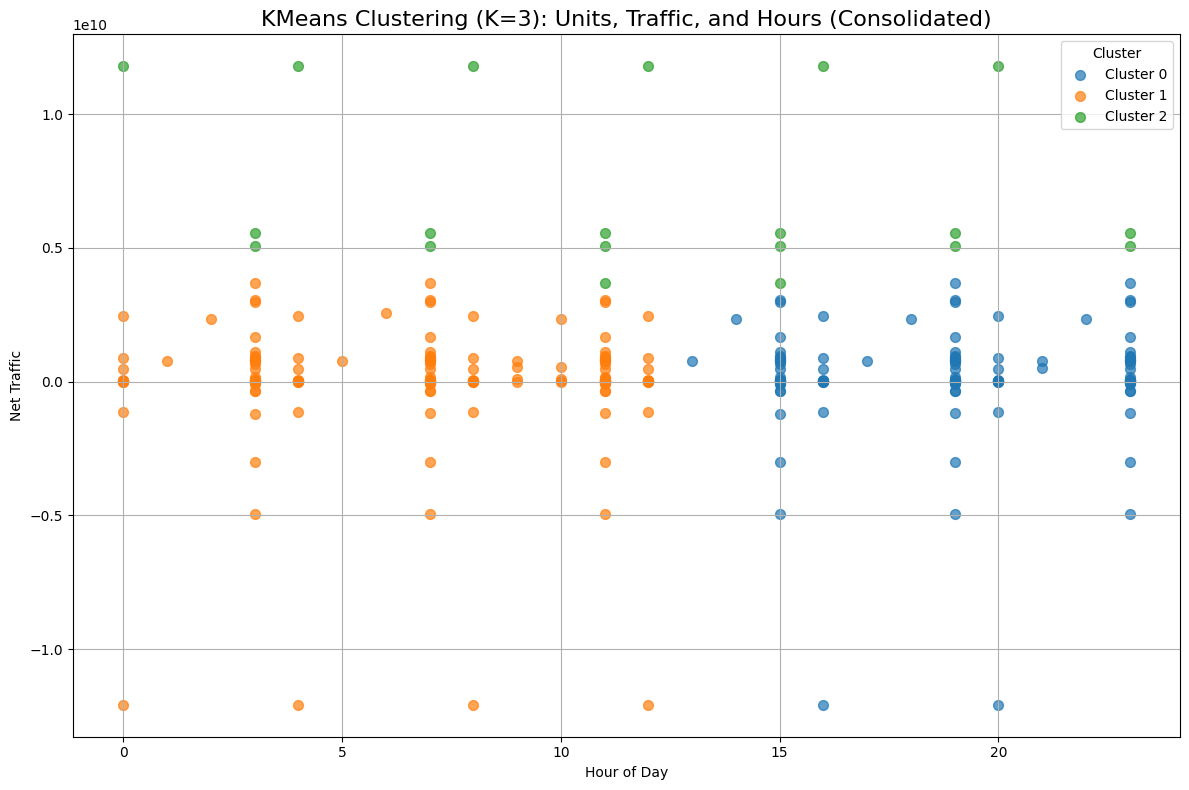

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Unit and Hour, calculate Net Traffic
grouped_data = data.groupby(['Unit', 'Hour']).agg({
    'Entries': 'sum',
    'Exits': 'sum'
}).reset_index()

# Calculate Net Traffic
grouped_data['Net Traffic'] = grouped_data['Entries'] - grouped_data['Exits']

# Prepare data for clustering
clustering_data = grouped_data[['Unit', 'Hour', 'Net Traffic']]

# Standardize the data (important for KMeans)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data[['Hour', 'Net Traffic']])

# Perform KMeans clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
grouped_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot all stations on one chart
plt.figure(figsize=(12, 8))
for cluster in range(k):
    cluster_data = grouped_data[grouped_data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Hour'],
        cluster_data['Net Traffic'],
        label=f'Cluster {cluster}',
        s=50,
        alpha=0.7
    )

# Customize the chart
plt.title('KMeans Clustering (K=3): Units, Traffic, and Hours (Consolidated)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Net Traffic')
plt.legend(title='Cluster')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()



<ipython-input-45-4c2f83304eea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Cluster'] = kmeans.fit_predict(X_scaled)
<ipython-input-45-4c2f83304eea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Cluster'] = kmeans.fit_predict(X_scaled)
<ipython-input-45-4c2f83304eea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

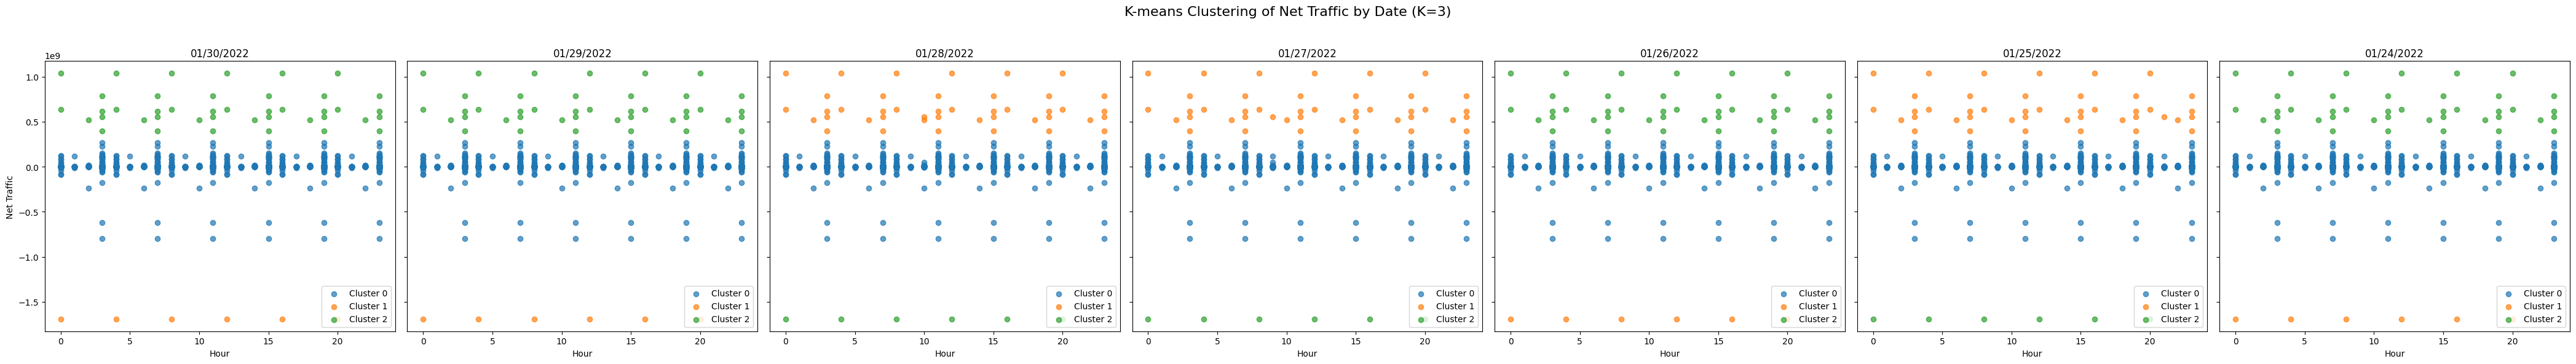

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Number of clusters for K-means
K = 3

# Get unique dates
unique_dates = data['Date'].unique()

# Set up the layout for subplots: one row for all dates
fig, axes = plt.subplots(1, len(unique_dates), figsize=(len(unique_dates) * 6, 6), sharey=True)
axes = axes.flatten()  # Flatten for easier indexing

# Loop through each date
for i, date in enumerate(unique_dates):
    daily_data = data[data['Date'] == date]

    # Prepare the data for clustering: use 'Net Traffic'
    X = daily_data[['Net Traffic']]

    # Scale the data for better clustering results
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
    daily_data['Cluster'] = kmeans.fit_predict(X_scaled)

    # Plotting on the assigned subplot
    for cluster in range(K):
        cluster_data = daily_data[daily_data['Cluster'] == cluster]
        axes[i].scatter(cluster_data['Hour'], cluster_data['Net Traffic'], label=f'Cluster {cluster}', alpha=0.7)

    # Customize the subplot
    axes[i].set_title(f"{date}")
    axes[i].set_xlabel('Hour')
    if i == 0:  # Only set the y-label on the first subplot
        axes[i].set_ylabel('Net Traffic')
    axes[i].legend()

# Adjust layout
plt.suptitle('K-means Clustering of Net Traffic by Date (K=3)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<ipython-input-32-fa3dc2afd993>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Cluster'] = kmeans.fit_predict(scaled_data)
<ipython-input-32-fa3dc2afd993>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Cluster'] = kmeans.fit_predict(scaled_data)
<ipython-input-32-fa3dc2afd993>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

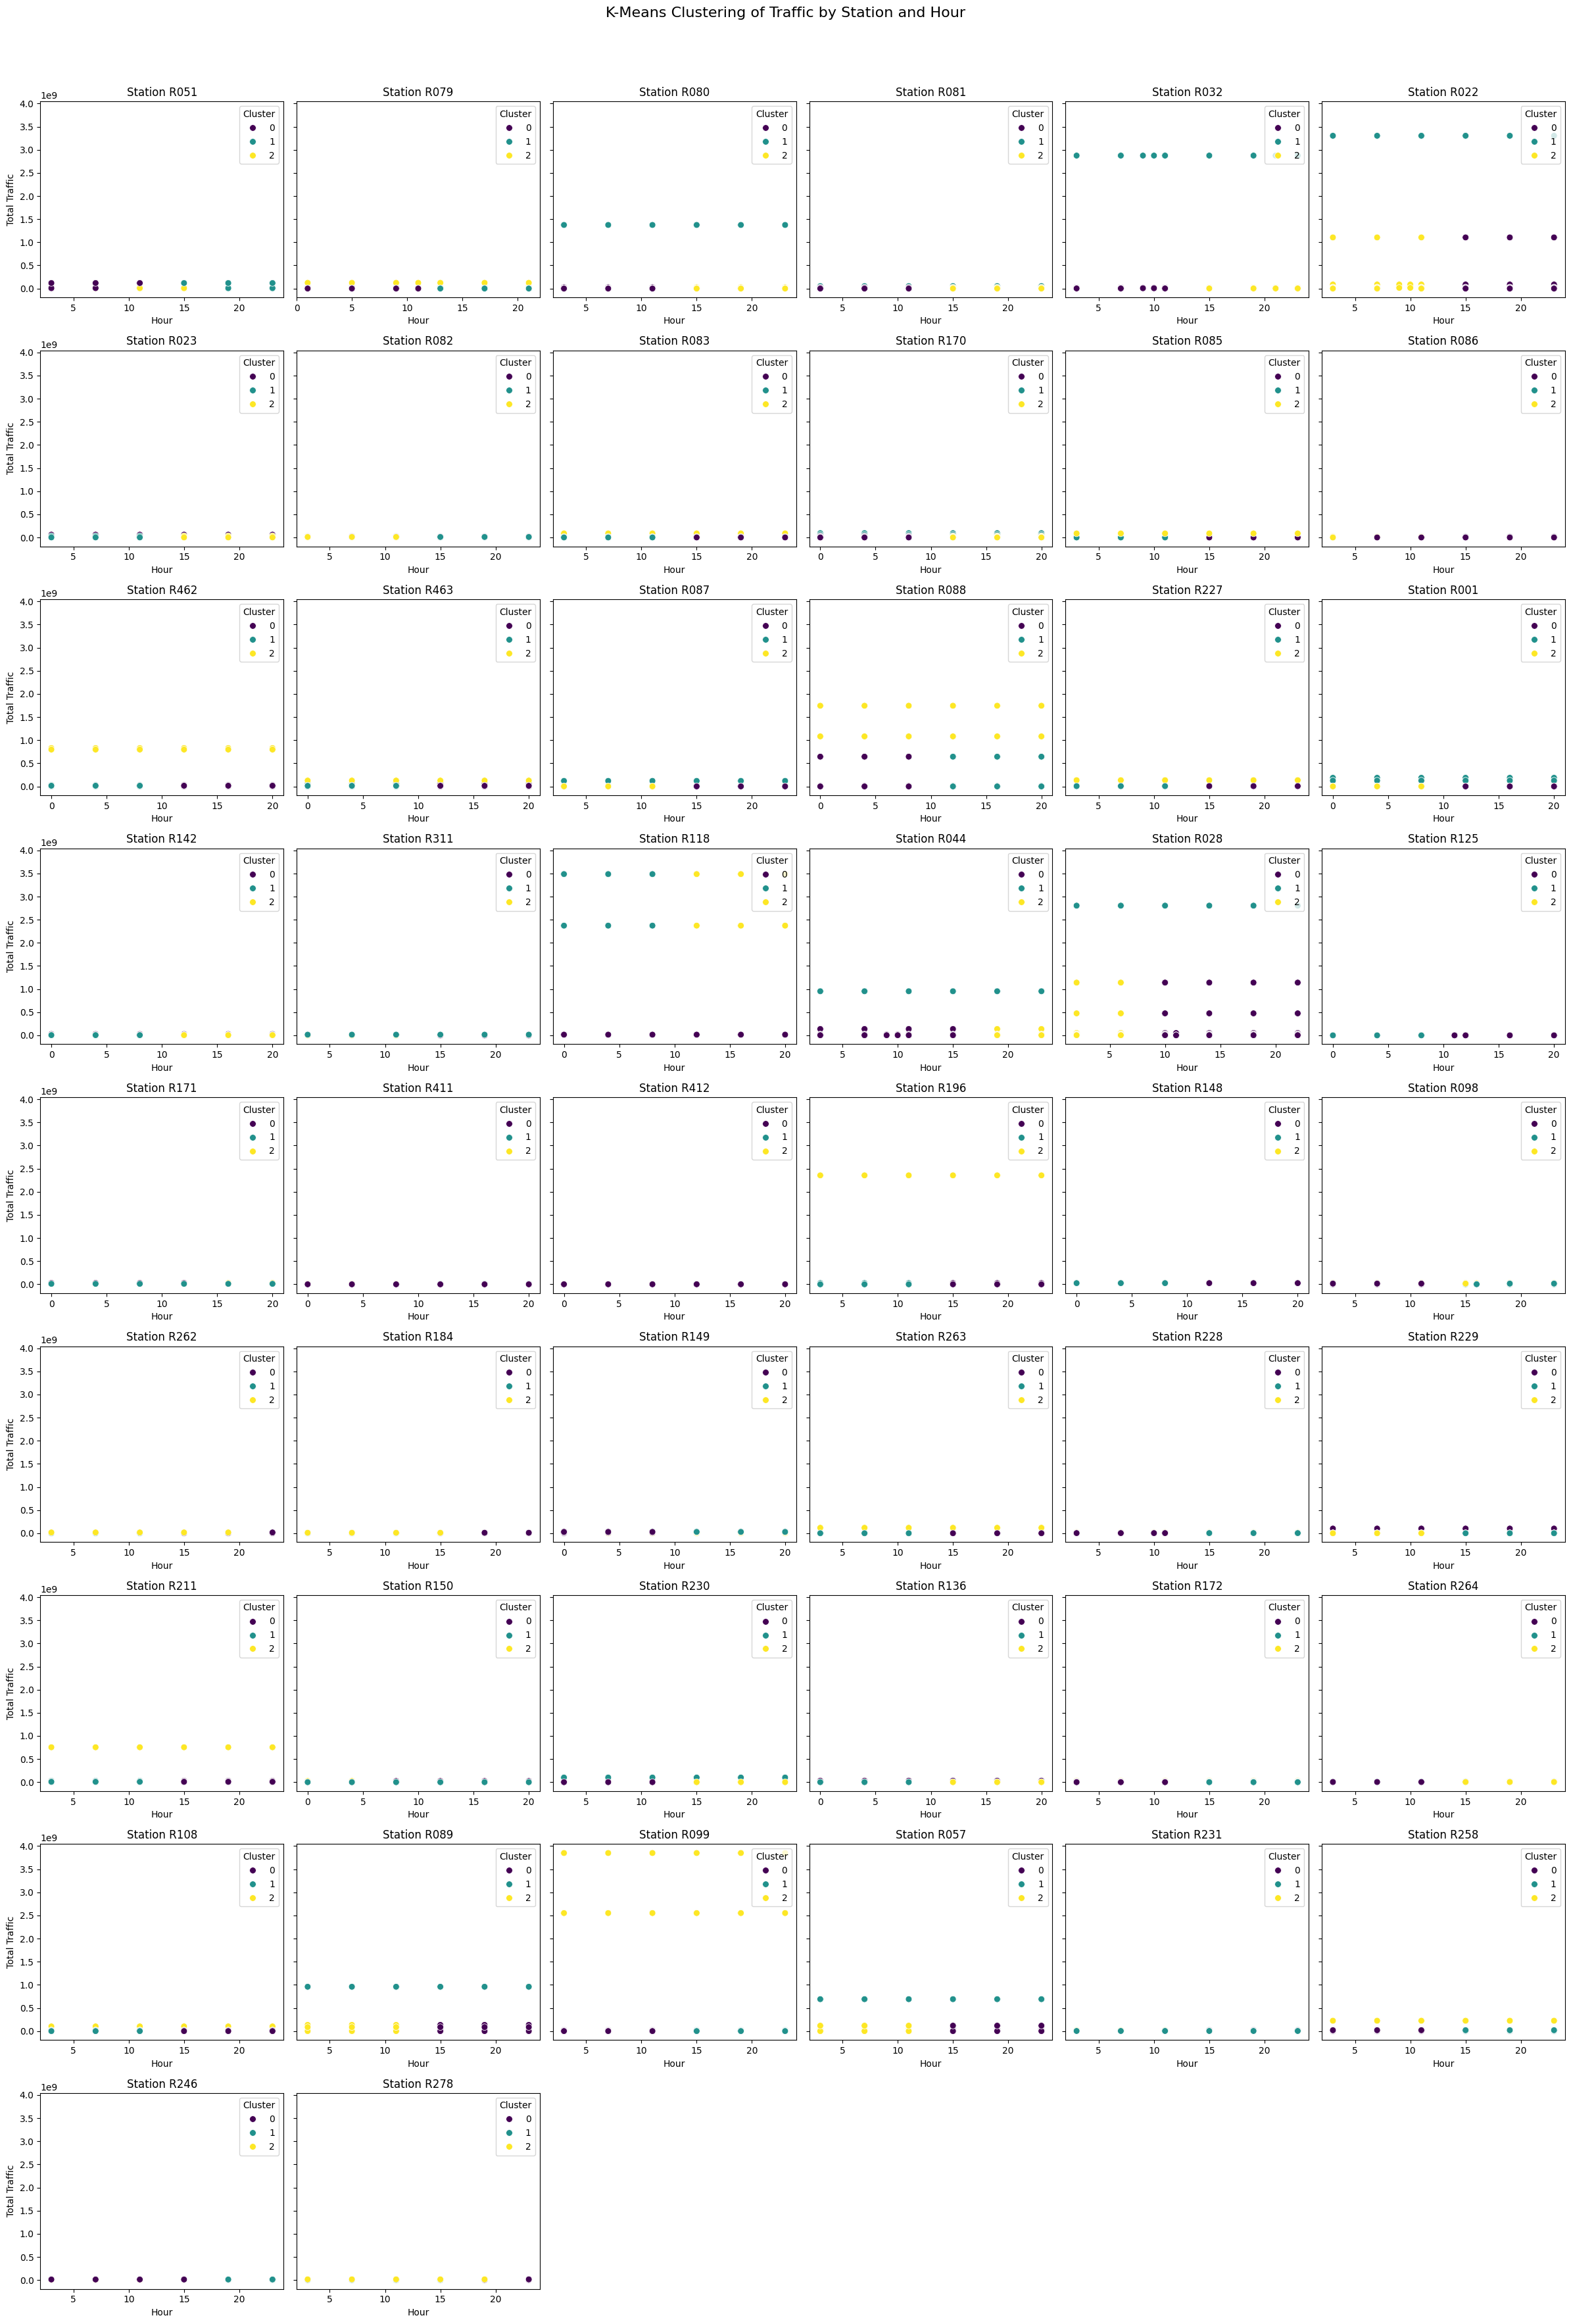

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Add a Traffic_Level column based on thresholds (if needed for reference)
threshold_high = 1e10
threshold_medium = 5e9
data['Traffic_Level'] = data['Total Traffic'].apply(
    lambda x: 'High' if x > threshold_high else ('Medium' if x > threshold_medium else 'Low')
)

# Get unique stations
stations = data['Unit'].unique()

# Define the grid layout: 6 stations per row
stations_per_row = 6
num_rows = math.ceil(len(stations) / stations_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, stations_per_row, figsize=(24, num_rows * 4), sharey=True)
axes = axes.flatten()  # Flatten for easier indexing

# Apply K-Means and plot each station
K = 3  # Number of clusters
for i, station in enumerate(stations):
    station_data = data[data['Unit'] == station]

    if not station_data.empty:
        # Prepare data for K-Means (scaling the Total Traffic and Hour)
        kmeans_features = station_data[['Hour', 'Total Traffic']]
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(kmeans_features)

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=K, random_state=42)
        station_data['Cluster'] = kmeans.fit_predict(scaled_data)

        # Plot scatterplot for clusters
        sns.scatterplot(
            ax=axes[i],
            data=station_data,
            x='Hour',
            y='Total Traffic',
            hue='Cluster',  # Use K-Means cluster labels for coloring
            palette='viridis',
            s=50
        )
        axes[i].set_title(f"Station {station}")
        axes[i].set_xlabel('Hour')
        axes[i].set_ylabel('Total Traffic')
        axes[i].legend(title='Cluster', loc='upper right')

# Hide unused subplots
for j in range(len(stations), len(axes)):
    axes[j].axis('off')

# Adjust layout
fig.suptitle('K-Means Clustering of Traffic by Station and Hour', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [43]:
# Group data by Date and Hour, and calculate Net Traffic
rush_hour_data = data.groupby(['Date', 'Hour']).agg({
    'Entries': 'sum',
    'Exits': 'sum'
}).reset_index()

# Calculate Net Traffic
rush_hour_data['Total Traffic'] = rush_hour_data['Entries'] - rush_hour_data['Exits']

# Sort the data by Net Traffic in descending order to find top 5 rush hour periods
top_rush_hours = rush_hour_data.sort_values(by='Total Traffic', ascending=False).head(5)

# Print the top 5 rush hour periods
print("Top 5 Rush Hour Periods and Corresponding Days:")
print(top_rush_hours[['Date', 'Hour', 'Total Traffic']])


Top 5 Rush Hour Periods and Corresponding Days:
           Date  Hour  Total Traffic
83   01/27/2022    11     3073240893
107  01/28/2022    11     2979488300
11   01/24/2022    11     2956516828
35   01/25/2022    11     2953573788
59   01/26/2022    11     2953239906


In [44]:
# Group data by Date and Hour, and calculate Net Traffic
daily_rush_hour_data = data.groupby(['Date', 'Hour']).agg({
    'Entries': 'sum',
    'Exits': 'sum'
}).reset_index()

# Calculate Net Traffic
daily_rush_hour_data['Net Traffic'] = daily_rush_hour_data['Entries'] - daily_rush_hour_data['Exits']

# Find the hour with the highest Net Traffic for each day
peak_rush_hour_per_day = daily_rush_hour_data.loc[
    daily_rush_hour_data.groupby('Date')['Net Traffic'].idxmax()
]

# Print the peak rush hour for each day
print("Peak Rush Hour for Each Day:")
print(peak_rush_hour_per_day[['Date', 'Hour', 'Net Traffic']])


Peak Rush Hour for Each Day:
           Date  Hour  Net Traffic
11   01/24/2022    11   2956516828
35   01/25/2022    11   2953573788
59   01/26/2022    11   2953239906
83   01/27/2022    11   3073240893
107  01/28/2022    11   2979488300
127  01/29/2022     7   2953112905
163  01/30/2022    19   2953012856
